## Data 설명
---
[Glass Identification](https://archive.ics.uci.edu/ml/datasets/glass+identification)

1987년 법의학(Forensic Science) 분야에서 범죄 현장에서 발견된 유리 조각이 어떤 종류인지를 분류하는 규칙을 세우기 위해 사용된 자료이다.
유리의 종류별로 굴절률과 구성 성분의 함량을 측정한 자료이다. 

## 변수 설명
---

Na, Mg, Al, Si, K, Ca, Ba, Fe 등은 일정 질량의 유리 조각에서 각 성분이 차지하는 질량의 백분율이다.

| 번호 | 칼럼명 | 설명|
|:---|:---|:---|
| 1 | ID | 1에서 214 |
| 2 | RI | 굴절률 |
| 3 | Na | 나트륨 |
| 4 | Mg | 마그네슘 |
| 5 | Al | 알루미늄 |
| 6 | Si | 실리콘 |
| 7 | K | 칼륨 |
| 8 | Ca | 칼슘 |
| 9 | Ba | 바륨 |
| 10 | Fe | 철 |
| 11 | Type of Glass | 유리 종류(Target) | 

Target 종류
- 1: 플로트 공법(Float Processing)으로 만들어진 건물의 창유리
- 2: 플로트 공법(Float Processing)이 아닌 건물의 창유리
- 3: 플로트 공법 처리된 차량 유리
- 4: 플로트 공법 처리되지 않은 차량 유리
- 5: 유리 용기
- 6: 유리 잔
- 7: 전등 유리

*플로트 공법(Float Processing)란 판 유리를 만드는 공법으로 용융된 유리물을 금속 위로 흘려보내면서 균일한 두께의 판유리로 성형하는 방법이다. 

In [0]:
import pandas as pd

# 변수명이 포함되어 있지 않으므로 header=None로 불러오기
df = pd.read_csv('https://raw.githubusercontent.com/joongyang/Machine-Learning-by-Examples/master/GlassIdentificationData.data', delimiter=',', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,10
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
0     214 non-null int64
1     214 non-null float64
2     214 non-null float64
3     214 non-null float64
4     214 non-null float64
5     214 non-null float64
6     214 non-null float64
7     214 non-null float64
8     214 non-null float64
9     214 non-null float64
10    214 non-null int64
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [8]:
# 분석하기 쉽게 변수명을 할당해 준다.
df.columns = ['ID','X1','X2','X3','X4','X5','X6','X7','X8','X9','Y']

# target을 범주형 변수로 지정한다
df['Y'] = pd.Categorical(df['Y'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
ID    214 non-null int64
X1    214 non-null float64
X2    214 non-null float64
X3    214 non-null float64
X4    214 non-null float64
X5    214 non-null float64
X6    214 non-null float64
X7    214 non-null float64
X8    214 non-null float64
X9    214 non-null float64
Y     214 non-null category
dtypes: category(1), float64(9), int64(1)
memory usage: 17.3 KB


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [9]:
df['Y'].value_counts(sort=False)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Y, dtype: int64

In [10]:
# 일련 번호를 제거한다
df = df.drop(columns=['ID'])
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [11]:
# 1번과 2번 유리 종류를 분류하는데 필요한 자료만 추출한다.
dfbin = df.loc[(df.Y == 1) | (df.Y == 2)]
dfbin.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [12]:
dfbin.Y.value_counts()

2    76
1    70
7     0
6     0
5     0
3     0
Name: Y, dtype: int64

In [0]:
# features와 target을 분리한다.
X = dfbin.iloc[:,:-1]
Y = dfbin['Y']

In [0]:
# 훈련 자료와 테스트 자료에 각 분류 항목의 자료가 
# 전체 자료와 같은 비율로 들어 있도록 stratify 매개 변수에 
# target을 지정한다.
from sklearn.model_selection import train_test_split
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.4,
                                          stratify=Y, random_state=201911)

정규화, 교차 검증 없이 단순하게 random forest 모형을 훈련한다.
Random forest는 여러 개의 decision tree를 이용하여 분류하는 모형이다.
이처럼 여러 개의 모형의 결합하는 기법을 ensemble이라고 한다.

In [15]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_tr, Y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
clf.score(X_ts, Y_ts)  # 기본적으로 정확도를 계산한다.

0.7796610169491526

In [0]:
# 훈련된 모형으로 테스트 자료에 대한 예측을 실행한다.
pred = clf.predict(X_ts)

In [18]:
from sklearn import metrics
# 다음 함수로 평가 측도를 계산할 때 average 매개변수에
# 'macro', 'micro', 'weighted'를 지정할 수 있다.
accuracy = metrics.accuracy_score(Y_ts, pred)
precision = metrics.precision_score(Y_ts, pred, average='micro')
recall = metrics.recall_score(Y_ts, pred, average='weighted')
f1 = metrics.f1_score(Y_ts, pred, average='macro')
print('Accuracy: {:.3f}, Precison: {:.3f}, Recall: {:.3f}, F1 score: {:.3f}'.format(accuracy, precision, recall, f1))

Accuracy: 0.780, Precison: 0.780, Recall: 0.780, F1 score: 0.779


In [19]:
# 훈련된 분류 모형의 성능을 평가한다.
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_ts, pred)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[24  4]
 [ 9 22]]


([<matplotlib.axis.YTick at 0x7fa05cf55630>,
 <a list of 4 Text yticklabel objects>)

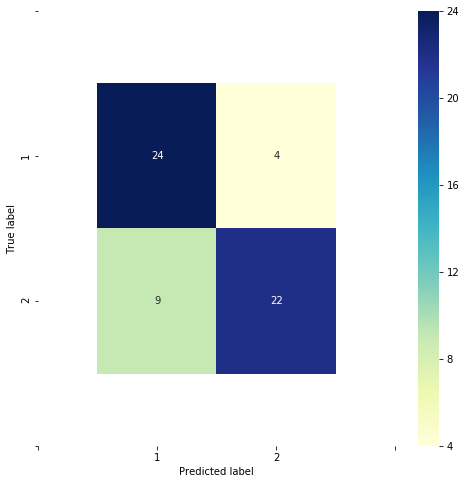

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ticks = np.arange(-0.5, 3.5, 1)

plt.figure(figsize=(8, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel(ylabel='True label')
plt.xlabel(xlabel='Predicted label')
plt.xticks(ticks, ['','1','2',''], size=10)
plt.yticks(ticks, ['','1','2',''], size=10)

In [21]:
from sklearn.metrics import classification_report

print(f'성능 \n {classification_report(Y_ts, pred)}')

성능 
               precision    recall  f1-score   support

           1       0.73      0.86      0.79        28
           2       0.85      0.71      0.77        31

    accuracy                           0.78        59
   macro avg       0.79      0.78      0.78        59
weighted avg       0.79      0.78      0.78        59



## 분류 문제에서 유의할 점

자료가 많지 않은 분류 항목이 있는 경우에는 해당 항목을 분류하는 모형을 충분히 훈련할 수 없기 때문에 좋은 결과를 얻기 어렵다.
Glass Indentification Data의 경우 3, 5, 6번 분류 항목이 자료 수가 작으며, 이를 다시 훈련 자료와 테스트 자료로 나눈다면 훈련에 사용할 자료의 수는 더 작아질 것이다.
따라서 3, 5, 6번 분류 항목에 대한 부분의 훈련이 충분히 진행될 수 없을 것이다.
이런 이유로 3, 5, 6번 분류 항목에 해당하는 자료를 제거하고 1, 2, 7번 세 가지로 분류하기로 한다.

In [0]:
# 3, 5, 6번 분류와 3번 분류를 항목에 해당하는 자료를 제거한다.
# isin 매서드를 이용하여 1,2,7 분류 항목에 해당하는 자료를 추출하여 newdf를 만든다.
newdf = df[df['Y'].isin([1,2,7])]

In [23]:
newdf['Y'].value_counts()

2    76
1    70
7    29
6     0
5     0
3     0
Name: Y, dtype: int64

In [0]:
# features와 target을 분리한다.
X = newdf.iloc[:,:-1]
Y = newdf['Y']

In [0]:
# 훈련 자료와 테스트 자료에 각 분류 항목의 자료가 
# 전체 자료와 같은 비율로 들어 있도록 stratify 매개 변수에 
# target을 지정한다.
from sklearn.model_selection import train_test_split
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, Y, test_size=0.3,
                                          stratify=Y, random_state=201911)

In [26]:
# LogisticRegression 수행
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_tr, Y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
logit.score(X_ts, Y_ts)

0.7358490566037735

In [29]:
from sklearn.metrics import confusion_matrix
Y_pred = logit.predict(X_ts)

print(confusion_matrix(Y_ts, Y_pred))

[[15  6  0]
 [ 6 15  2]
 [ 0  0  9]]


In [30]:
from sklearn.metrics import classification_report

Y_pred = logit.predict(X_ts)

print(classification_report(Y_ts, Y_pred))

              precision    recall  f1-score   support

           1       0.71      0.71      0.71        21
           2       0.71      0.65      0.68        23
           7       0.82      1.00      0.90         9

    accuracy                           0.74        53
   macro avg       0.75      0.79      0.77        53
weighted avg       0.73      0.74      0.73        53



### 분류 모형에 대한 cross-validation과 Grid Search

Logistic Regression 모형으로 세 가지 유리 종류로 분류하기로 한다.


### Logistic regression 모형의 hyperparameter
 
 1. penalty의 종류: penalty 매개변수에 'l1', 'l2', 'elasticnet', 'none'를 지정할 수 있다.
 
 2. penalty의 강도: 매개변수 C에 양수로 지정한다. C가 클수록 규제화를 강하게 한다. penalty 매개변수에 'elasticnet'을 지정한 경우에는 추가로 l1_ratio 매개변수에 $\rho$를 지정할 수 있다.
 
 3. 3가지 이상을 분류할 경우 Logistic regression를 적용하는 방법: multi_class 매개변수에 'ovr' 또는 'multinomial'로 지정한다. 'ovr'은 이진 분류를 위한 logistic regression을 여러 번 실행하는 방법이고, 'multinomial'은 다항분포를 이용하여 한 번의 logistic regression을 실행하는 방법이다.


In [0]:
Y_tr = pd.Categorical(Y_tr, categories=[1, 2, 7])

In [45]:
Y_tr[::10]

[7, 2, 1, 1, 1, ..., 1, 2, 7, 1, 2]
Length: 13
Categories (3, int64): [1, 2, 7]

In [44]:
pd.get_dummies(Y_tr)

,1,2,7
0,0,0,1
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0
...,...,...,...
117,1,0,0
118,1,0,0
119,0,0,1
120,0,1,0


### 규제화(regularization)

1. Linear Regression: $MSE(\beta_1, \beta_2, \cdots)$를 최소화한다.

2. Ridge: $MSE(\beta_1, \beta_2, \cdots) + \alpha \sum_{i=1} \beta_i^2$을 최소화한다. $\sum_{i=1} \beta_i^2$를 $L_2-$norm penalty라고 한다.

3. Lasso: $MSE(\beta_1, \beta_2, \cdots) + \alpha \sum_{i=1} |\beta_i|$을 최소화한다. $\sum_{i=1} \beta_i^2$를 $L_1-$norm penalty라고 한다.

4. ElasticNet: $MSE(\beta_1, \beta_2, \cdots) + \alpha (1- \rho) \sum_{i=1} \beta_i^2 + \alpha \rho \sum_{i=1} |\beta_i|$을 최소화한다. $L_1-$norm penalty와 $L_2-$norm penalty를 혼합한 것이다.

1. Logistic Regression: $Entropy(\beta_1, \beta_2, \cdots)$를 최소화
2. Logistic Regression에도 $L_1-$norm penalty와 $L_2-$norm penalty 또는 이를 결합한 ElasticNet penalty를 적용할 수 있다.



In [0]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

skf = StratifiedKFold(n_splits=7, random_state=12345)

logit = LogisticRegression(max_iter=1000, solver='saga', tol=1e-3)

params = {'C': np.power(10.0, np.arange(-10, 10)),
          'penalty': ['l1','l2'],
          'multi_class': ['ovr','multinomial']}

logit_gs = GridSearchCV(logit, param_grid=params, cv=skf, refit=True)

In [0]:
logit_gs.fit(X_tr, Y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=12345, shuffle=False),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09]),
                         'multi_class': ['ovr', 'multino

In [0]:
logit_gs.best_params_

{'C': 1.0, 'multi_class': 'multinomial', 'penalty': 'l1'}

In [0]:
logit_gs.best_score_ #훈련자료에서의 최대 스코어

0.6967213114754098

In [0]:
from sklearn.metrics import confusion_matrix
Y_pred = logit_gs.predict(X_ts)

print(confusion_matrix(Y_ts, Y_pred))

[[14  7  0]
 [ 6 16  1]
 [ 0  0  9]]


In [0]:
print(classification_report(Y_ts, Y_pred))

              precision    recall  f1-score   support

           1       0.70      0.67      0.68        21
           2       0.70      0.70      0.70        23
           7       0.90      1.00      0.95         9

    accuracy                           0.74        53
   macro avg       0.77      0.79      0.78        53
weighted avg       0.73      0.74      0.73        53

